In [7]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 경고 무시
warnings.filterwarnings('ignore')

#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [8]:
df = pd.read_csv('./csv/model_results.csv')
df

,Model,Best Score,Best Parameter
0,KNN,0.768374,"{'clf__n_neighbors': 20, 'clf__p': 2, 'clf__we..."
1,ANN,0.745668,"{'clf__activation': 'relu', 'clf__alpha': 0.1,..."
2,DNN,0.784820,"{'clf__batch_size': 128, 'clf__epochs': 50, 'c..."
3,Tree,0.692843,{'clf__max_depth': 4}
4,Logit,0.788022,{'clf__C': 0.1}
5,RF,0.752439,"{'clf__max_depth': 4, 'clf__n_estimators': 40}"
6,SVM,0.788677,"{'clf__C': 1000, 'clf__gamma': 0.0001}"


In [9]:
models = df.Model.values.tolist()
scores = df['Best Score'].values.tolist()
params = df['Best Parameter'].values.tolist()
print(models, '\n', scores, '\n', params)

['KNN', 'ANN', 'DNN', 'Tree', 'Logit', 'RF', 'SVM'] 
 [0.7683743403152125, 0.7456682830512843, 0.7848200767234578, 0.6928430893123201, 0.788022262703331, 0.7524390185777786, 0.7886769667892857] 
 ["{'clf__n_neighbors': 20, 'clf__p': 2, 'clf__weights': 'uniform'}", "{'clf__activation': 'relu', 'clf__alpha': 0.1, 'clf__hidden_layer_sizes': (50,)}", "{'clf__batch_size': 128, 'clf__epochs': 50, 'clf__optimizer': 'rmsprop'}", "{'clf__max_depth': 4}", "{'clf__C': 0.1}", "{'clf__max_depth': 4, 'clf__n_estimators': 40}", "{'clf__C': 1000, 'clf__gamma': 0.0001}"]


최적의 알고리즘: SVM
최적의 정확도: 0.7886769667892857


Text(0, 0.5, 'Accuracy')

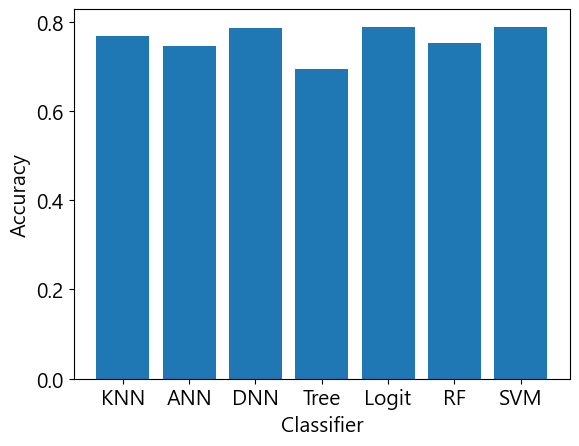

In [10]:
scores_arr=np.array(scores) # 검증용 데이터셋의 정확도
max_rate=np.max(scores_arr) # 가장 좋은 정확도
idx=np.argmax(scores_arr) # 최대값의 인덱스
print("최적의 알고리즘:", models[idx])
print("최적의 정확도:", max_rate)

plt.rcParams["font.size"]=15
plt.bar(models, scores_arr)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")